# EDA report

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd

from pricing.eda import generate_eda_report, plot_train_test_split
import matplotlib.pyplot as plt

%load_ext kedro.ipython
%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.display.float_format = "{:20,.4f}".format
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

[02/04/25 11:14:36] INFO     Using                                                                  ]8;id=544781;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=914842;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/si                
                             te-packages/kedro/framework/project/rich_logging.yml' as logging                      
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=863391;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=266451;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=403999;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=808528;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=785936;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=570250;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /Users/jonas_cristens/projects/postal-pricing.                                        
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/04/25 11:14:38] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=588327;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=601576;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project pricing                                                  ]8;id=318925;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=896587;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=18105;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=370926;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=591734;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=542900;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#153\153]8;;\

In [8]:
country = 'czech_republic'
target_col = catalog.load(f"params:{country}.modelling.target.target_col")
splitting_dates = catalog.load(f"params:{country}.modelling.train_split")

df = catalog.load(f"{country}.modelling.modelling_dataset")
df.head()

[02/04/25 11:19:06] INFO     Loading data from                                                  ]8;id=416936;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=405023;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#390\390]8;;\
                             params:czech_republic.modelling.target.target_col                                     
                             (MemoryDataset)...                                                                    

                    INFO     Loading data from params:czech_republic.modelling.train_split      ]8;id=139819;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=40780;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#390\390]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Loading data from czech_republic.modelling.modelling_dataset       ]8;id=929757;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=989553;file:///Users/jonas_cristens/projects/postal-pricing/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#390\390]8;;\
                             (ParquetDataset)...                                                                   

,published_revenue_shp,created_date_off,discount_shp,final_outcome,organization_id,product_cluster_shp,loyalty_code_cust,industry,opportunity_type_oppo,lead_cust,initiator_cust,competitor_oppo,log_published_revenue,log_published_revenue_sq,log_potential_revenue,log_offer_published_revenue,log_shipments,log_wps,log_weight,prod_mix_tdexport,prod_mix_tdimport,prod_mix_td3rd,prod_mix_tddom,prod_mix_other,ecomm,accepted
18980,"534,524.0000",2022-11-01 08:02:14,82.1484,Accepted,DHL CZ,DDExport,Downtrader,IND:TECH,NaN,NaN,NaN,NaN,13.1891,173.9532,NaN,13.5684,4.1744,4.3820,8.5564,0.0000,0.0000,0.0000,0.0000,0.0000,0,1.0000
18981,"246,519.0000",2022-11-01 08:02:14,74.9621,Accepted,DHL CZ,DDImport,Downtrader,IND:TECH,NaN,NaN,NaN,NaN,12.4152,154.1371,NaN,13.5684,2.7081,5.2983,8.0064,0.0000,0.0000,0.0000,0.0000,0.0000,0,1.0000
18982,"22,075.0000",2022-11-01 08:55:49,85.8532,Accepted,DHL CZ,DDExport,Regained,IND:CSMR,NaN,LEAD:NEW,INIT:DHL,NaN,10.0022,100.0440,NaN,11.1936,1.6094,0.6931,2.3026,0.6962,0.0000,0.0000,0.0000,0.0000,0,1.0000
18983,"50,590.0000",2022-11-01 08:55:49,77.0000,Accepted,DHL CZ,TDExport,Regained,IND:CSMR,NaN,LEAD:NEW,INIT:DHL,NaN,10.8315,117.3216,NaN,11.1936,2.3026,1.0986,3.4012,0.6962,0.0000,0.0000,0.0000,0.0000,0,1.0000
18984,"621,962.0000",2022-11-01 10:06:55,85.4169,Accepted,DHL CZ,TDExport,Inactive,IND:RETL,NaN,LEAD:NEW,INIT:CUSTOMER,NaN,13.3406,177.9725,NaN,13.3730,5.1930,0.0000,5.1930,0.9681,0.0319,0.0000,0.0000,0.0000,1,1.0000


In [12]:
df = pd.read_csv('../data/01_raw/czech_republic.csv').head()

'Average conversion rate for train and test sets:'


train_set                 0.9151
test_set                  0.9028
dtype: float64

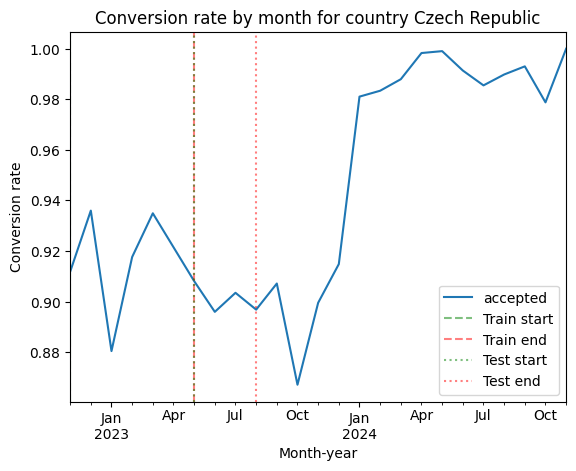

In [9]:
plot_train_test_split(df, target_col, splitting_dates, country=country)

'--- Data Overview ---'

'Number of rows: 21028'

'Number of columns: 26'

'Data Types:'


published_revenue_shp                 float64
created_date_off               datetime64[ns]
discount_shp                          float64
final_outcome                          object
organization_id                        object
product_cluster_shp                  category
loyalty_code_cust                    category
industry                             category
opportunity_type_oppo                category
lead_cust                            category
initiator_cust                       category
competitor_oppo                      category
log_published_revenue                 float64
log_published_revenue_sq              float64
log_potential_revenue                 float64
log_offer_published_revenue           float64
log_shipments                         float64
log_wps                               float64
log_weight                            float64
prod_mix_tdexport                     float64
prod_mix_tdimport                     float64
prod_mix_td3rd                   

'Summary Statistics for Numerical Variables:'

,count,mean,std,min,25%,50%,75%,max
published_revenue_shp,"21,028.0000","120,228.8128","781,163.4453",826.0000,"4,112.0000","13,287.5000","55,910.0000","57,264,449.0000"
discount_shp,"21,028.0000",57.1063,31.2066,0.0000,50.0000,70.0000,80.0000,98.9881
log_published_revenue,"21,028.0000",9.7722,1.7330,6.7166,8.3217,9.4946,10.9315,17.8632
log_published_revenue_sq,"21,028.0000",98.4984,36.0287,45.1126,69.2501,90.1470,119.4977,319.0936
log_potential_revenue,"14,737.0000",9.3452,1.3966,0.0000,8.5172,9.2591,10.3090,15.2506
log_offer_published_revenue,"21,028.0000",11.1971,1.6635,6.8690,9.7396,11.0431,12.3476,18.1606
log_shipments,"21,001.0000",0.9782,1.3373,0.0000,0.0000,0.0000,1.6094,8.5755
log_wps,"21,001.0000",1.6259,1.7153,-1.6094,0.0000,1.6094,2.9957,7.8240
log_weight,"21,001.0000",2.6041,2.3325,-1.2040,0.0000,2.7081,4.4998,11.1505
prod_mix_tdexport,"21,028.0000",0.3794,0.3198,0.0000,0.1315,0.2566,0.6004,1.0000


'Summary Statistics for Categorical Variables:'

,count,unique,top,freq
final_outcome,21028,2,Accepted,19866
organization_id,21028,1,DHL CZ,21028
product_cluster_shp,21028,7,TDExport,6791
loyalty_code_cust,20833,7,Uptrader,5791
industry,20964,12,IND:RETL,5536
opportunity_type_oppo,17849,7,Acquisition,11772
lead_cust,7690,6,LEAD:NEW,3930
initiator_cust,17282,3,INIT:DHL,13976
competitor_oppo,14390,6,COMP:OTHER,4224


'--- Data Quality Summary ---'

'Dataset contains 21028 observations and 26 features.'

'Data types:'


published_revenue_shp                 float64
created_date_off               datetime64[ns]
discount_shp                          float64
final_outcome                          object
organization_id                        object
product_cluster_shp                  category
loyalty_code_cust                    category
industry                             category
opportunity_type_oppo                category
lead_cust                            category
initiator_cust                       category
competitor_oppo                      category
log_published_revenue                 float64
log_published_revenue_sq              float64
log_potential_revenue                 float64
log_offer_published_revenue           float64
log_shipments                         float64
log_wps                               float64
log_weight                            float64
prod_mix_tdexport                     float64
prod_mix_tdimport                     float64
prod_mix_td3rd                   

'Missing values per column:'


loyalty_code_cust          195
industry                    64
opportunity_type_oppo     3179
lead_cust                13338
initiator_cust            3746
competitor_oppo           6638
log_potential_revenue     6291
log_shipments               27
log_wps                     27
log_weight                  27
dtype: int64

'Describe pandas DataFrame:'

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
published_revenue_shp,"21,028.0000",NaN,NaN,NaN,NaT,NaT,"120,228.8128","781,163.4453",826.0000,"4,112.0000","13,287.5000","55,910.0000","57,264,449.0000"
created_date_off,21028,8697,2023-09-26 12:28:46,7,2022-11-01 07:45:39,2024-11-01 14:04:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount_shp,"21,028.0000",NaN,NaN,NaN,NaT,NaT,57.1063,31.2066,0.0000,50.0000,70.0000,80.0000,98.9881
final_outcome,21028,2,Accepted,19866,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
organization_id,21028,1,DHL CZ,21028,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_cluster_shp,21028,7,TDExport,6791,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loyalty_code_cust,20833,7,Uptrader,5791,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industry,20964,12,IND:RETL,5536,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opportunity_type_oppo,17849,7,Acquisition,11772,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_cust,7690,6,LEAD:NEW,3930,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'--- Univariate Analysis ---'

'--- Association Analysis ---'

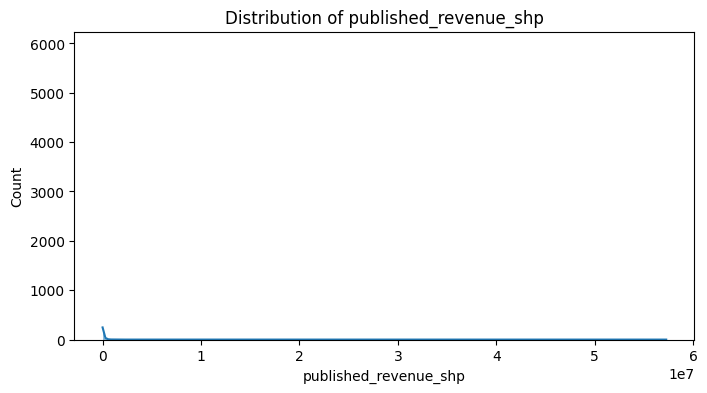

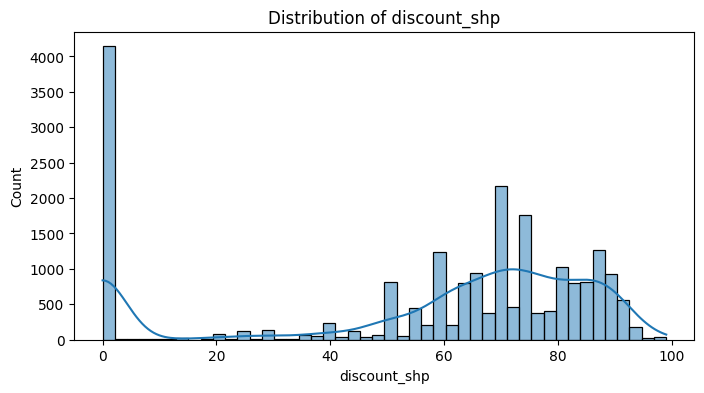

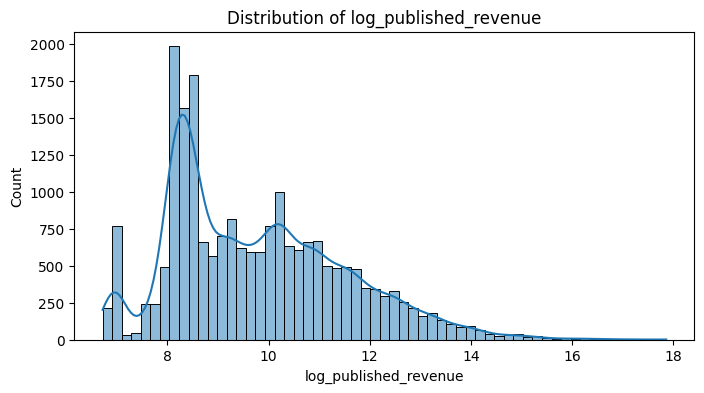

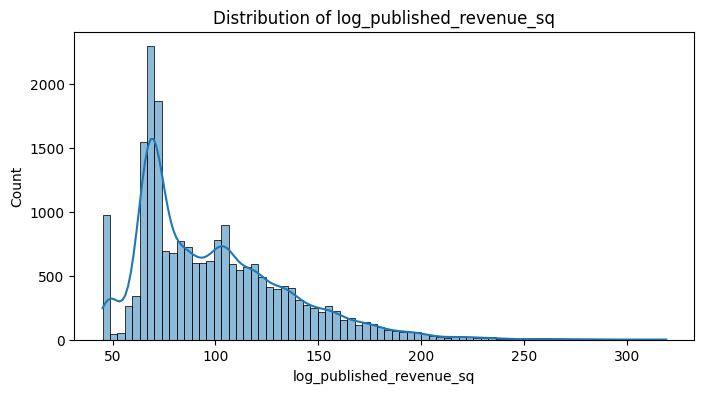

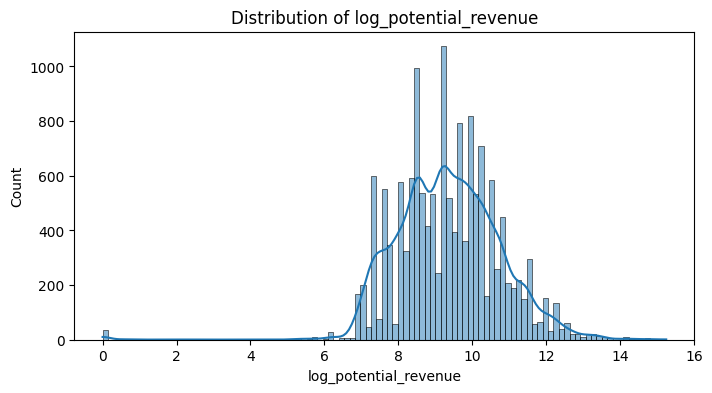

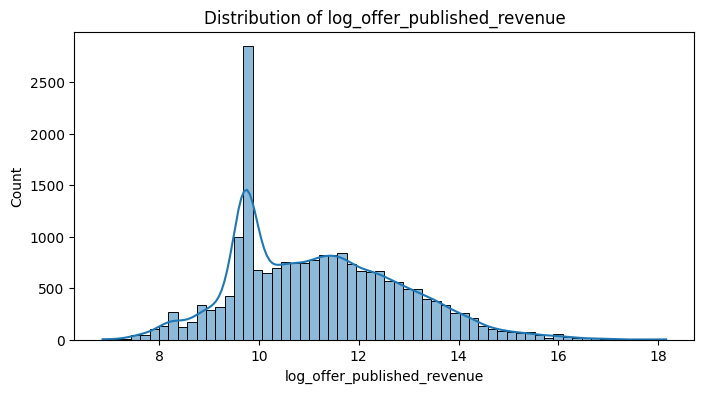

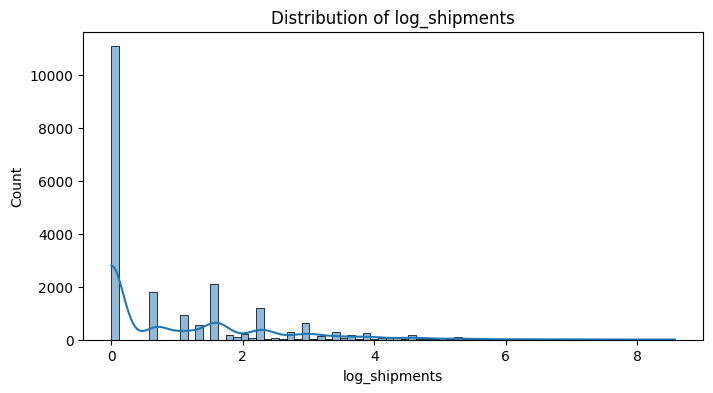

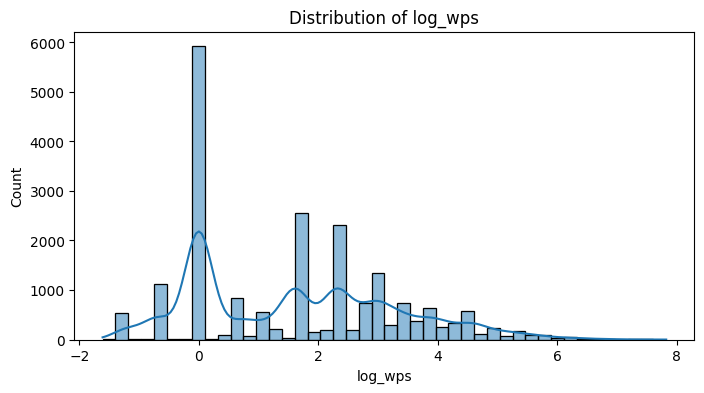

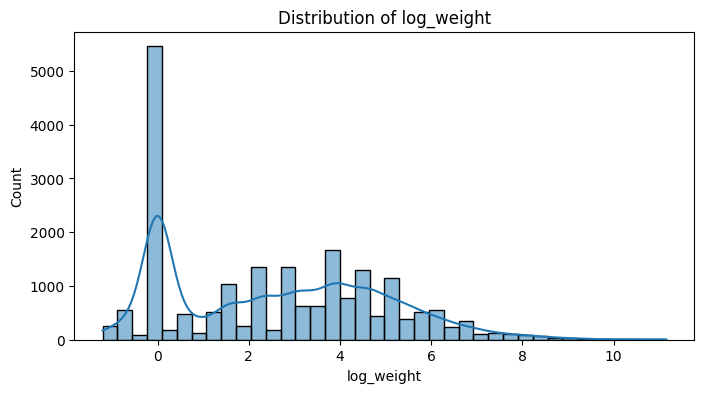

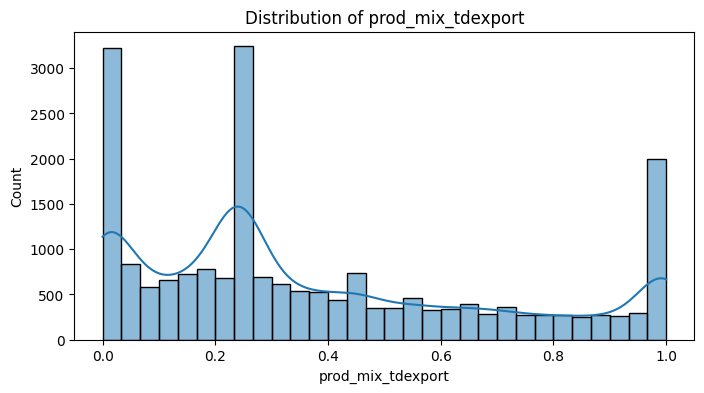

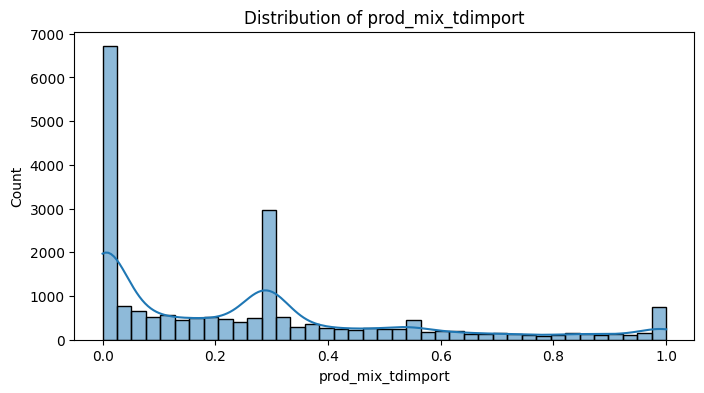

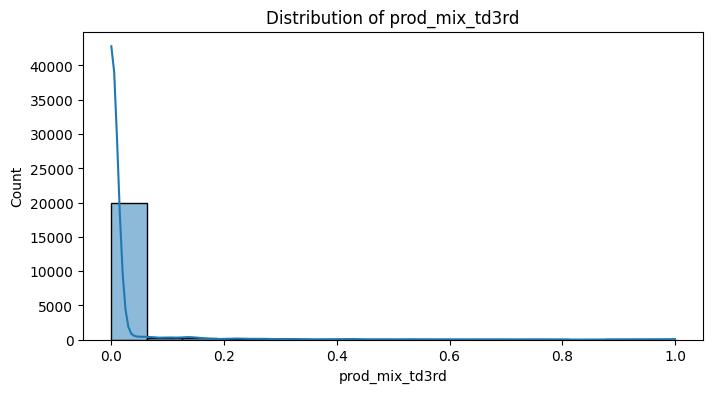

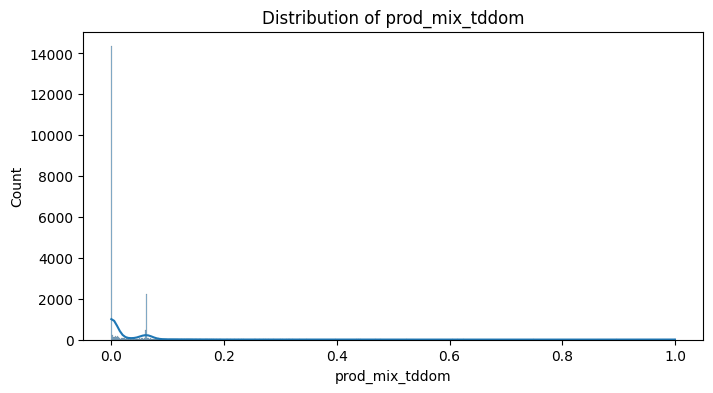

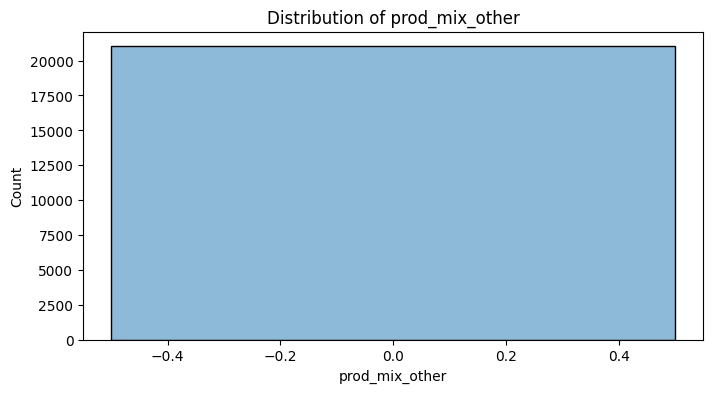

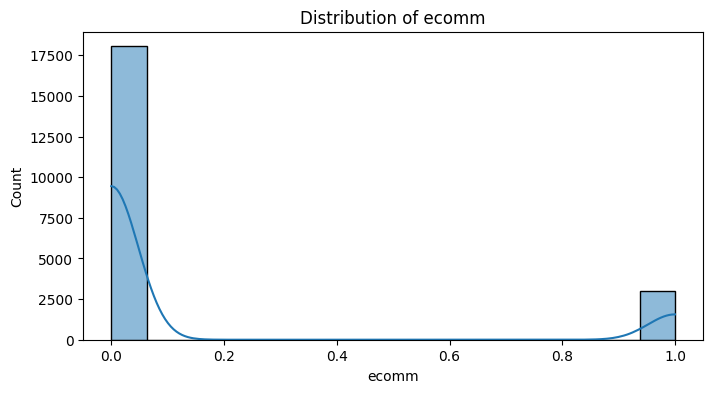

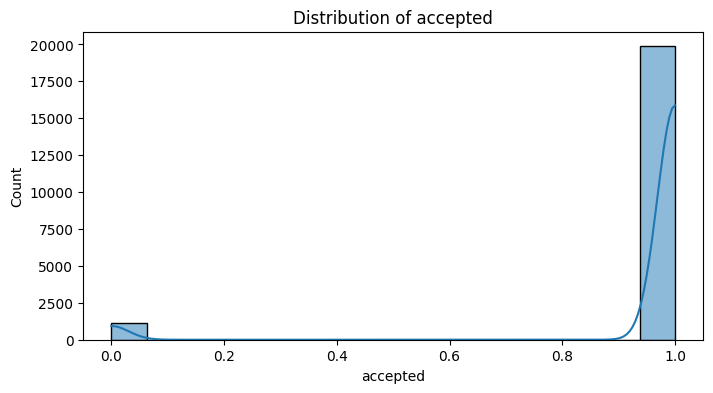

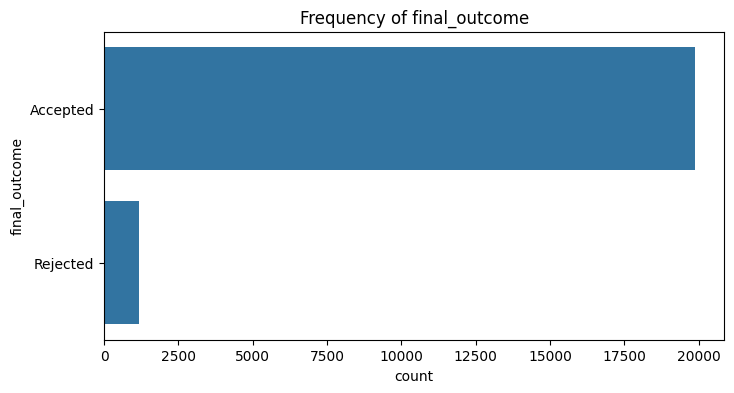

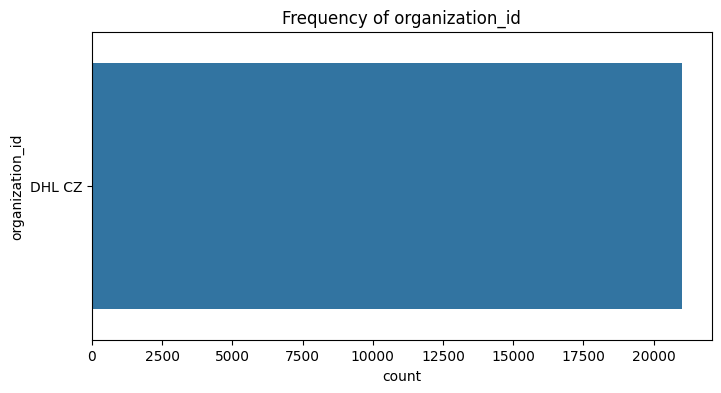

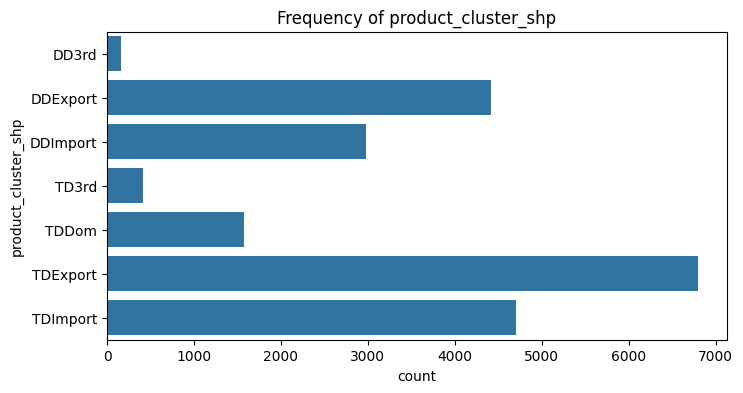

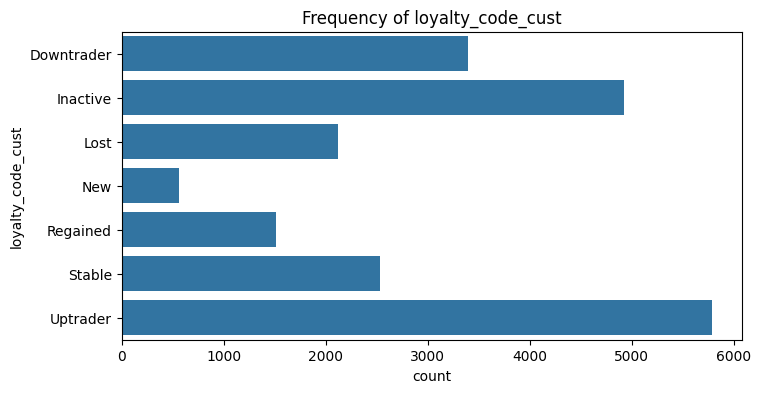

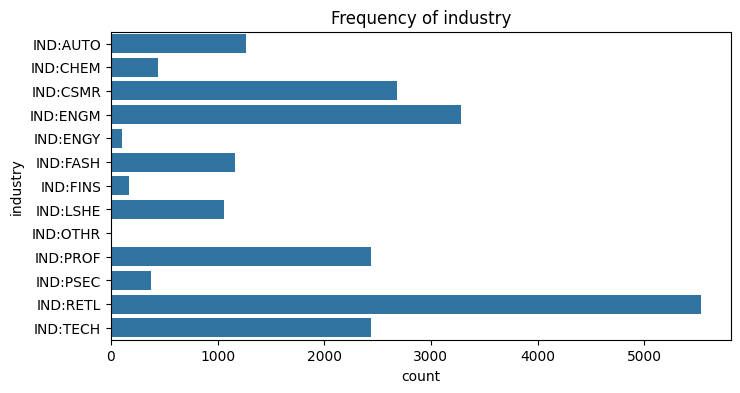

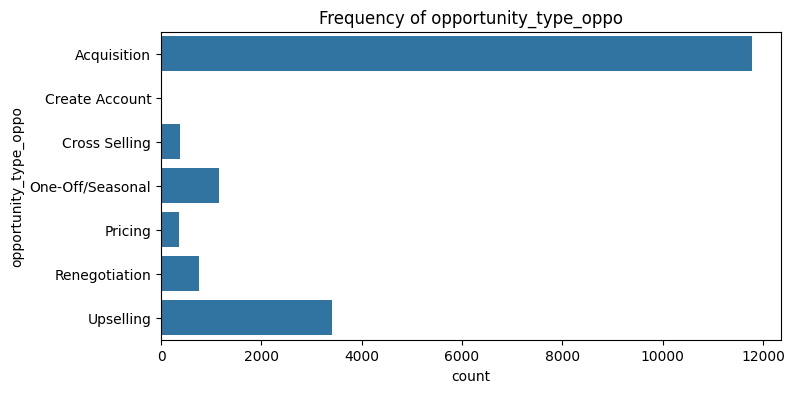

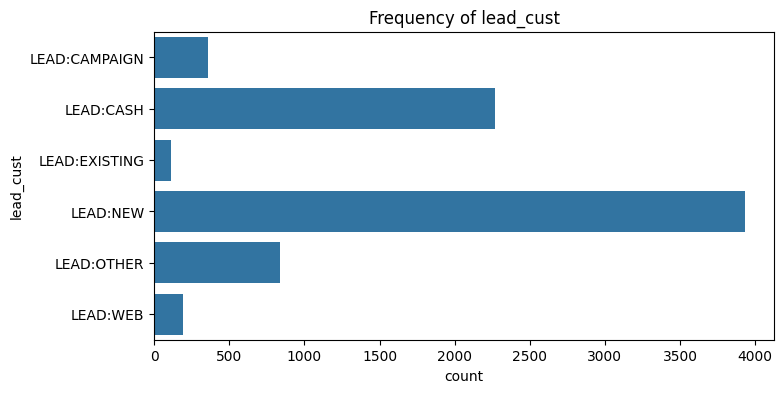

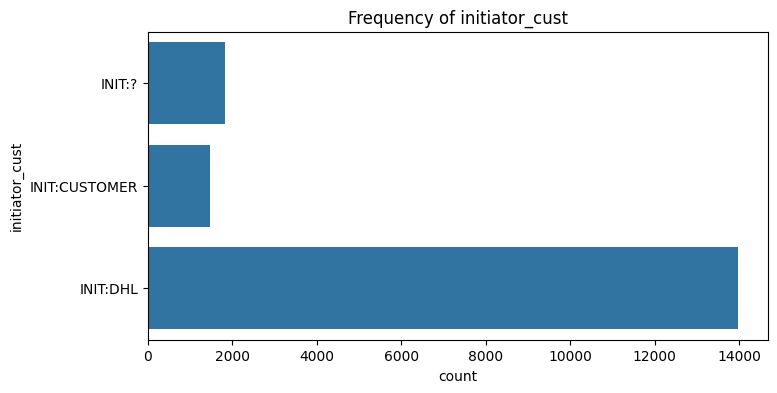

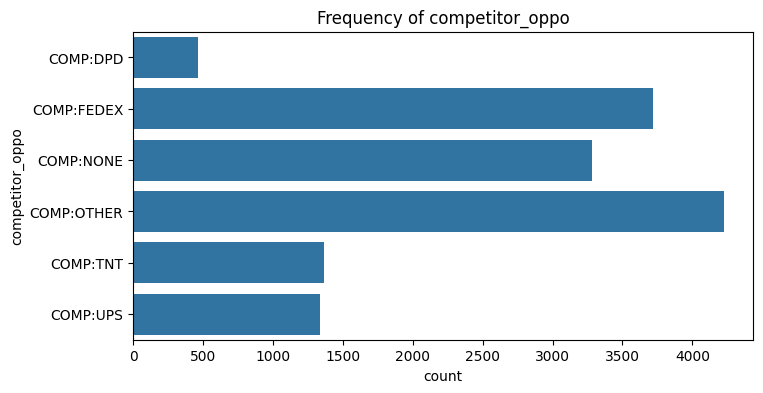

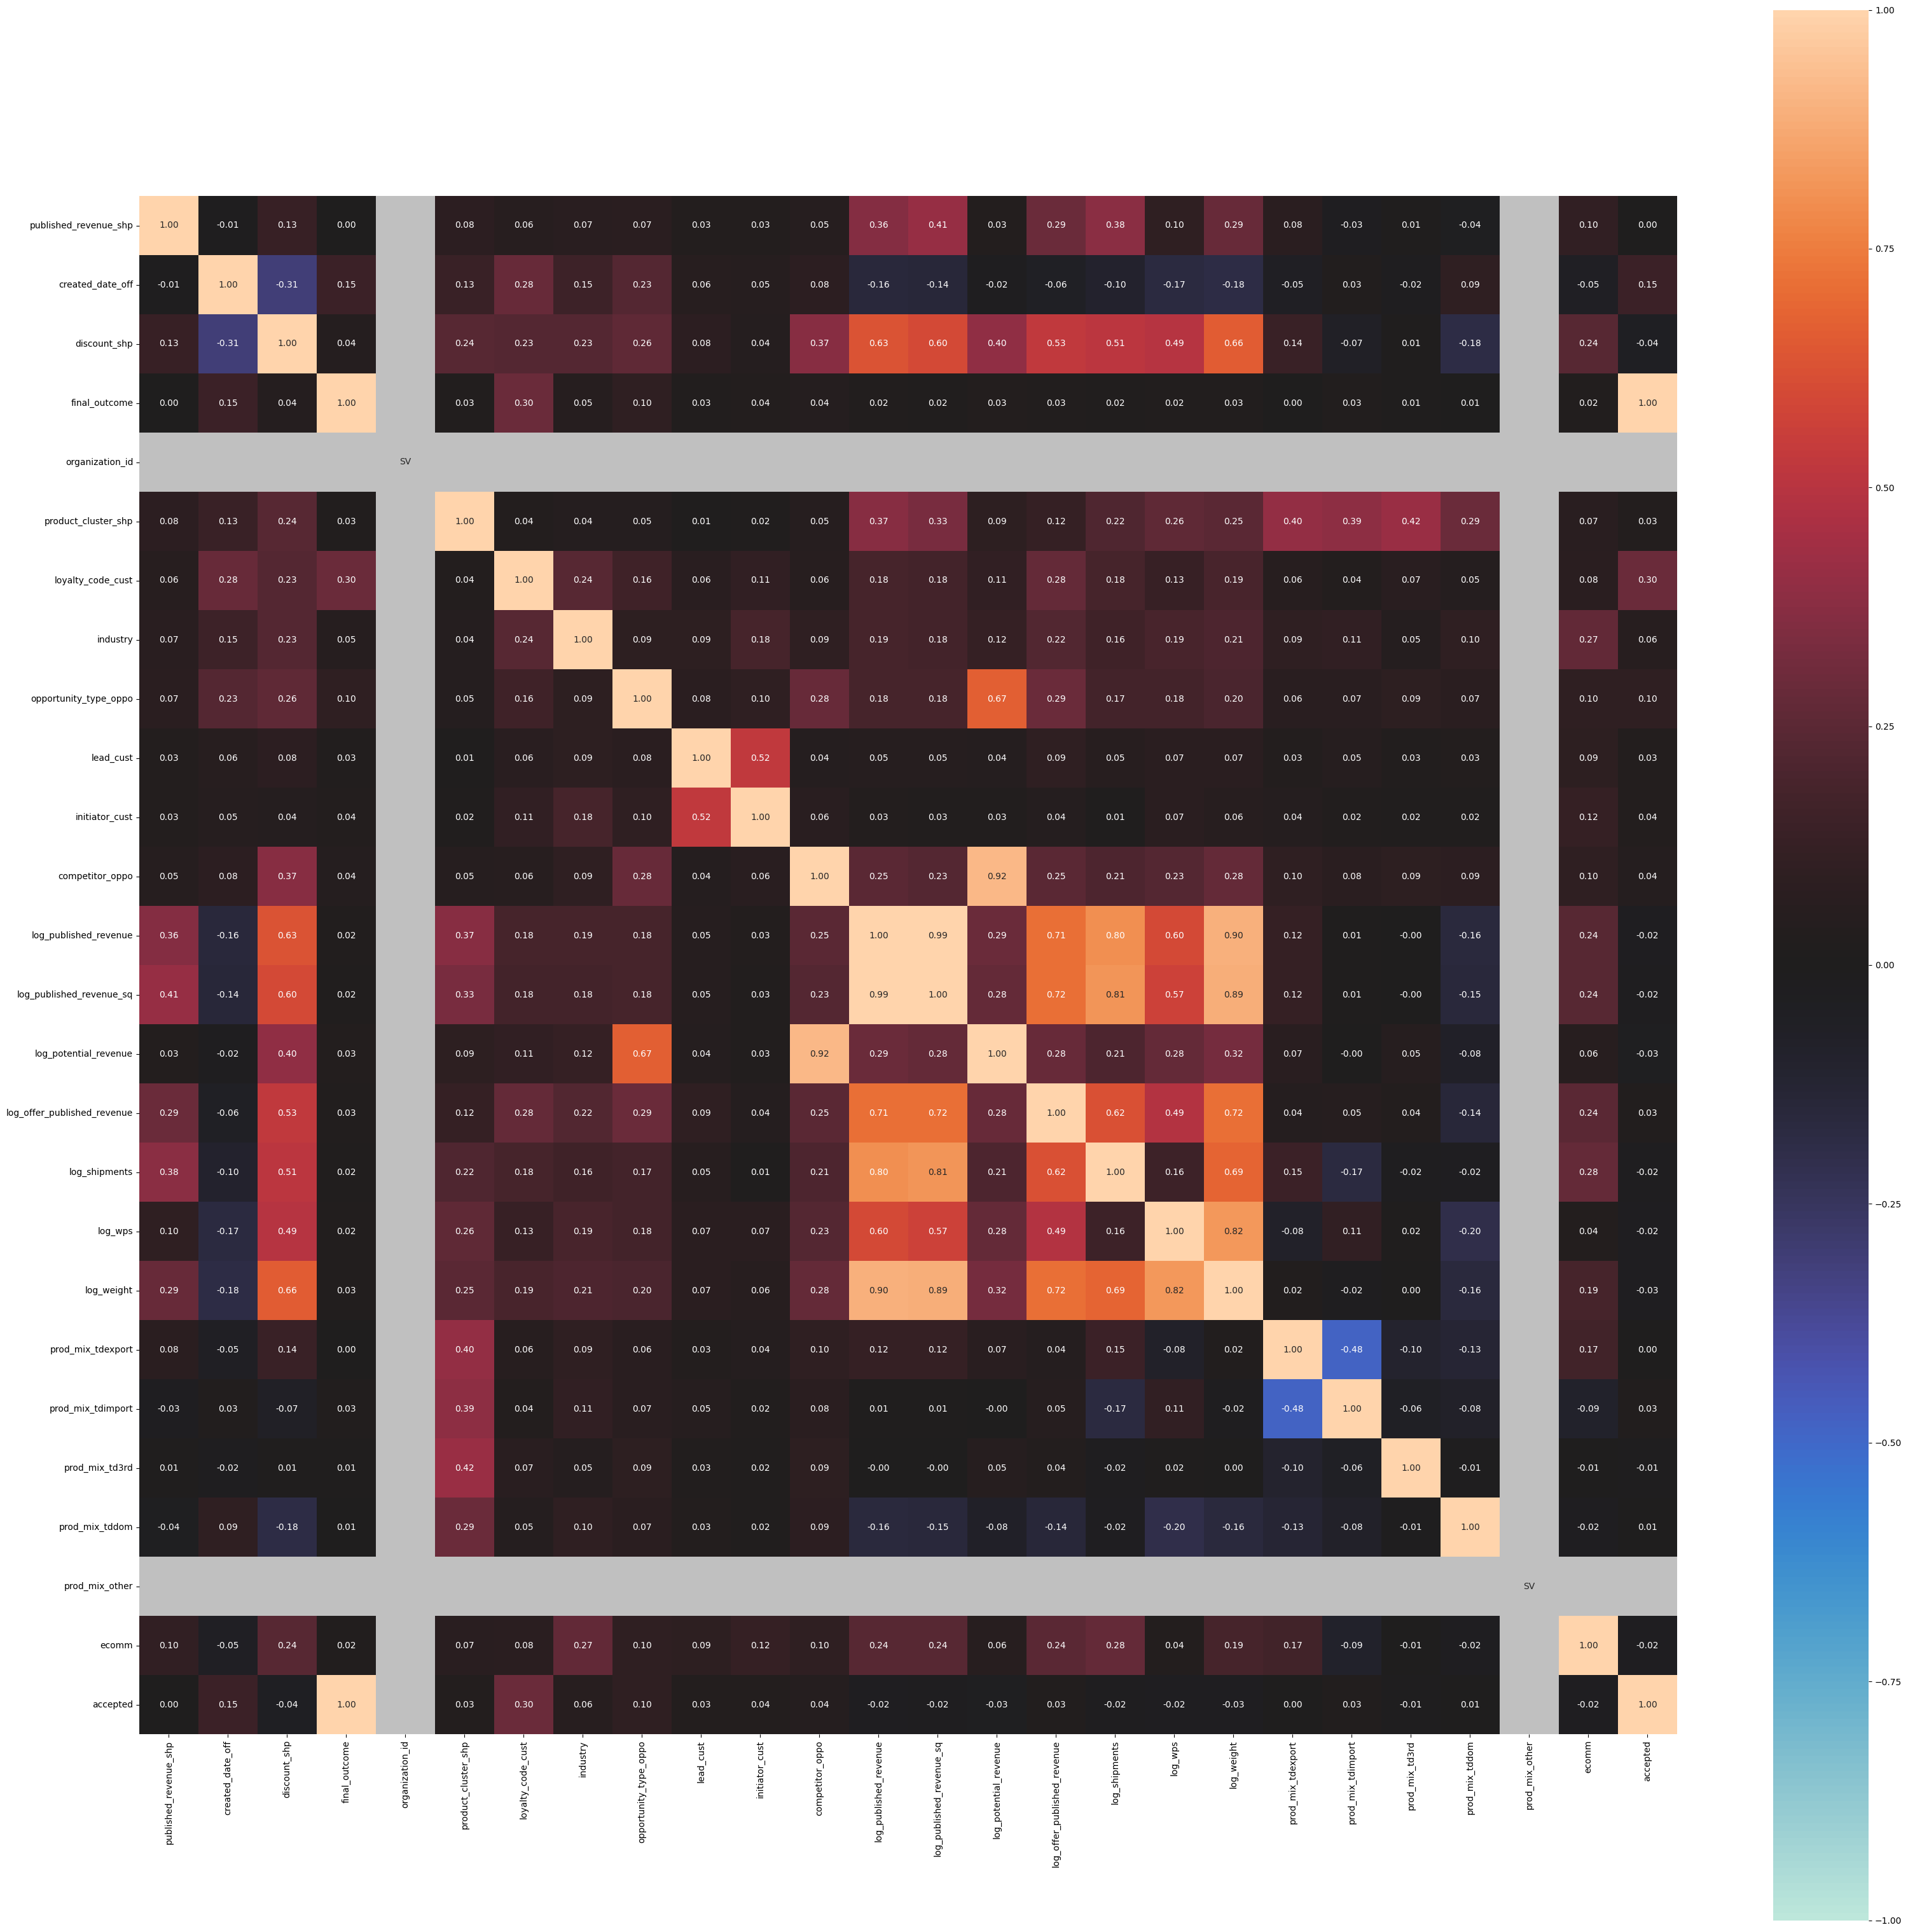

In [4]:
generate_eda_report(
    df,
    target_var=target_col,
    numerical_vars=df.select_dtypes(include=["int64", "float64"]).columns.tolist(),
    categorical_vars=df.drop(columns=["created_date_off"])
    .select_dtypes(include=["object", "category", "bool"])
    .columns.tolist(),
    include_bivariate_analysis=False,
)